#Predict obesity category based on data

In [1]:
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
seaborn.set(style='ticks')
import matplotlib.cm as cm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/dataset_ildat
!ls

Mounted at /content/drive
/content/drive/My Drive/dataset_ildat
bodyfat.csv	bodyfat_hasil.csv		       obesity_data.csv
bodyfat.gsheet	cleaned_animal_disease_prediction.csv  seattle-weather.csv


In [2]:
df = pd.read_csv('/content/drive/My Drive/dataset_ildat/obesity_data.csv')
df

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight
...,...,...,...,...,...,...,...
995,18,Male,155.588674,64.103182,26.480345,4,Overweight
996,35,Female,165.076490,97.639771,35.830783,1,Obese
997,49,Female,156.570956,78.804284,32.146036,1,Obese
998,64,Male,164.192222,57.978115,21.505965,4,Normal weight


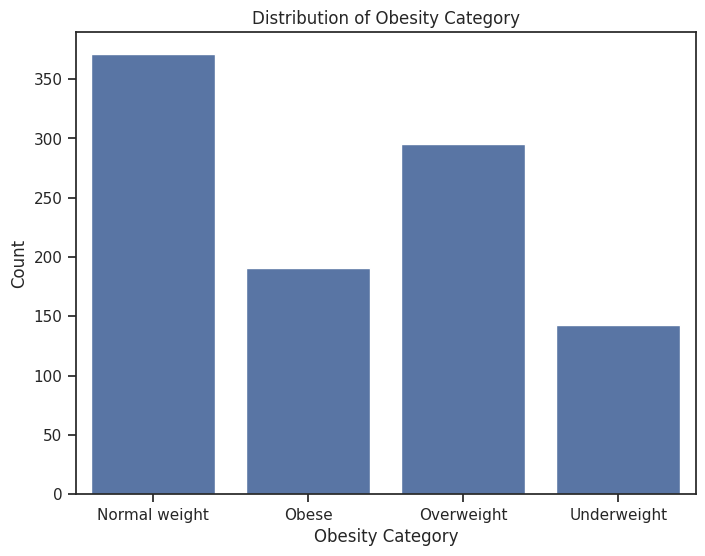

ObesityCategory
Normal weight    371
Overweight       295
Obese            191
Underweight      143
Name: count, dtype: int64


In [3]:
# prompt: buatkan plot untuk menghitung distribusi dari kolom obesitycategory dan tampilkan jumlahnya

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='ObesityCategory', data=df)
plt.title('Distribution of Obesity Category')
plt.xlabel('Obesity Category')
plt.ylabel('Count')
plt.show()

print(df['ObesityCategory'].value_counts())

#Label encoding

In [4]:
# prompt: prompt: buat codingan untuk encoding sesuai dengan df

# Encoding categorical features
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Define the categorical columns to encode
categorical_cols = ['Gender', 'ObesityCategory']

# Iterate over the categorical columns and apply label encoding
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Display the encoded DataFrame
print(df.head())

   Age  Gender      Height     Weight        BMI  PhysicalActivityLevel  \
0   56       1  173.575262  71.982051  23.891783                      4   
1   69       1  164.127306  89.959256  33.395209                      2   
2   46       0  168.072202  72.930629  25.817737                      4   
3   32       1  168.459633  84.886912  29.912247                      3   
4   60       1  183.568568  69.038945  20.487903                      3   

   ObesityCategory  
0                0  
1                1  
2                2  
3                2  
4                0  


#Memisahkan fitur dan label

In [5]:
#ambil kolom untuk label
label = (df['ObesityCategory'])
#print(label_diskrit)

# ambil kolom untuk features
features = (df.loc[:, 'Age':'PhysicalActivityLevel'])
features

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel
0,56,1,173.575262,71.982051,23.891783,4
1,69,1,164.127306,89.959256,33.395209,2
2,46,0,168.072202,72.930629,25.817737,4
3,32,1,168.459633,84.886912,29.912247,3
4,60,1,183.568568,69.038945,20.487903,3
...,...,...,...,...,...,...
995,18,1,155.588674,64.103182,26.480345,4
996,35,0,165.076490,97.639771,35.830783,1
997,49,0,156.570956,78.804284,32.146036,1
998,64,1,164.192222,57.978115,21.505965,4


#Data testing dan training

In [6]:
#split data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=0)

#Feature scaling

In [17]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaled_feature = scaler.transform(features)

import joblib

joblib.dump(scaler, '/content/drive/My Drive/scaler_obesity.sav')
scaler = joblib.load('/content/drive/My Drive/scaler_obesity.sav')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


#Penanganan data imbalance

In [8]:
from imblearn.over_sampling import SMOTE,RandomOverSampler, SMOTENC, SVMSMOTE, ADASYN
from imblearn.combine import SMOTEENN,SMOTETomek

oversample = SMOTE(k_neighbors=5)
#Melakukan oversampling data training saja
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


#Plot distribusi hasil SMOTE

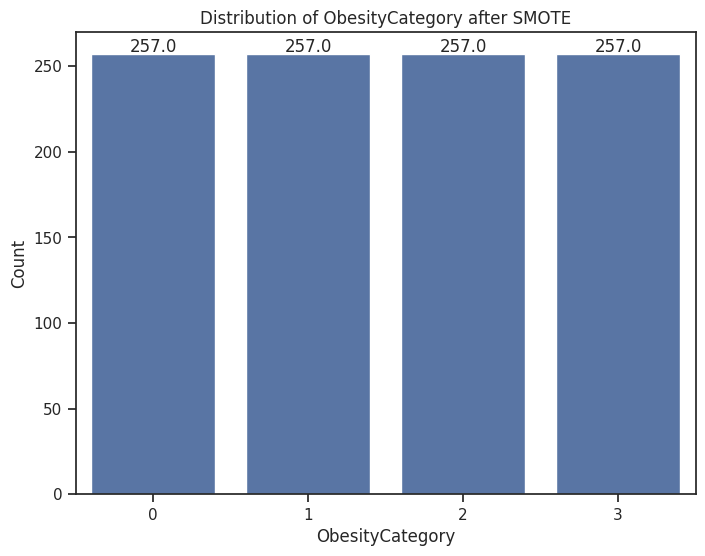

In [9]:
# prompt: buatkan plot distribusi hasil smote

# Import seaborn with the alias sns
import seaborn as sns

# Visualize the class distribution after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_smote)
plt.title('Distribution of ObesityCategory after SMOTE')
plt.xlabel('ObesityCategory')
plt.ylabel('Count')

# Display the counts on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

#Seleksi fitur menggunakan JMI



In [10]:
!pip install skfeature-chappers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 1.6 MB/s eta 0:00:00


In [11]:
from skfeature.function.similarity_based import fisher_score, reliefF, trace_ratio
from skfeature.function.statistical_based import f_score, chi_square, gini_index
from skfeature.function.information_theoretical_based import CIFE, JMI
from sklearn.preprocessing import StandardScaler

#melakukan label encoding label diskrit
encoder = preprocessing.LabelEncoder().fit(label)
transformed_label_diskrit = encoder.transform(label)
# print(transformed_label_diskrit)

# melakukan feature scaling
scaler = preprocessing.StandardScaler().fit(features)
scaled_feature = scaler.transform(features)
# print(scaled_feature)

ranked_index = JMI.jmi(scaled_feature, transformed_label_diskrit, mode='index', n_selected_features=scaled_feature.shape[1])
print("\nJMI")
print(ranked_index)

# menampilkan fitur yang sudah diurutkan berdasarkan seleksi fitur
result = scaled_feature[:, ranked_index[:]]
print(result)


JMI
[2 5 3 4 0 1]
[[ 0.34186404  1.31394294  0.05007594 -0.16096979  0.33929464  0.95501094]
 [-0.57498474 -0.47861223  1.20973904  1.37411521  1.05732009  0.95501094]
 [-0.19216404  1.31394294  0.11126628  0.15012898 -0.21303263 -1.04710843]
 ...
 [-1.30826818 -1.37488981  0.49016063  1.17233664 -0.04733445 -1.04710843]
 [-0.56868513  1.31394294 -0.85328182 -0.54635003  0.78115646  0.95501094]
 [ 0.82337373 -1.37488981  0.24231534 -0.22148122  0.89162191 -1.04710843]]


In [12]:
features.columns[ranked_index]

Index(['Height', 'PhysicalActivityLevel', 'Weight', 'BMI', 'Age', 'Gender'], dtype='object')

#HPO menggunakan GTB


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


jumlah_fitur_terbaik= 4
[[ 0.33929464  0.95501094  0.34186404  0.05007594]
 [ 1.05732009  0.95501094 -0.57498474  1.20973904]
 [-0.21303263 -1.04710843 -0.19216404  0.11126628]
 ...
 [-0.04733445 -1.04710843 -1.30826818  0.49016063]
 [ 0.78115646  0.95501094 -0.56868513 -0.85328182]
 [ 0.89162191 -1.04710843  0.82337373  0.24231534]]
Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END learning_rate=0.1, n_estimators=50;, score=0.943 total time=   0.5s
[CV 2/10] END learning_rate=0.1, n_estimators=50;, score=0.871 total time=   0.7s
[CV 3/10] END learning_rate=0.1, n_estimators=50;, score=0.943 total time=   0.7s
[CV 4/10] END learning_rate=0.1, n_estimators=50;, score=0.943 total time=   0.7s
[CV 5/10] END learning_rate=0.1, n_estimators=50;, score=0.957 total time=   0.9s
[CV 6/10] END learning_rate=0.1, n_estimators=50;, score=0.986 total time=   1.0s
[CV 7/10] END learning_rate=0.1, n_estimators=50;, score=0.900 total time=   1.9s
[CV 8/10] END learning_rate

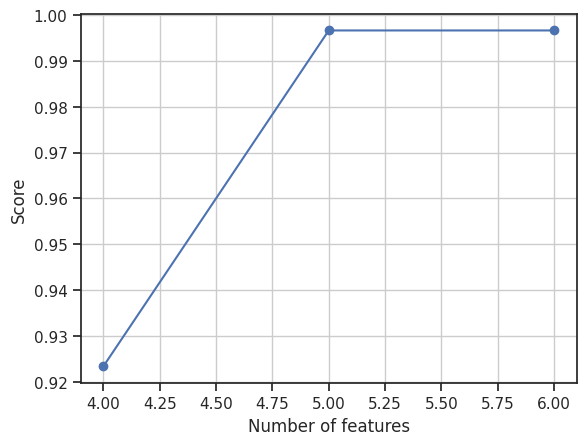

In [13]:
#Tulis jawaban di sini
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
#from lightgbm import LGBMClassifier


jumlah_fitur = range(4,scaled_feature.shape[1]+1)

#kita mulai dari 3 fitur
#jumlah_fitur = range(5,result.shape[1]+1)
#jumlah_fitur = range(0,8)

scores = []
score = 0
best_score = 0
best_feature_number = 0

#Mencoba optimasi hyperparameter untuk setiap kombinasi/jumlah fitur
for jumlah_fitur_terbaik in jumlah_fitur:
    print('jumlah_fitur_terbaik=',jumlah_fitur_terbaik)
    selected_features = scaled_feature[:, 0:jumlah_fitur_terbaik]
    print(selected_features)

    #split data training dan data testing
    X_train, X_test, y_train, y_test = train_test_split(selected_features, label, test_size=0.3, random_state=0)

    #Feature scaling
    scaler = StandardScaler()
    scaler.fit(X_train)
    #scaler.data_max_
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)

    #Proses Klasifikasi
    #classifier = DecisionTreeClassifier()
    #classifier = KNeighborsClassifier()
    #classifier = SVC()
    # classifier = RandomForestClassifier()
    # classifier = AdaBoostClassifier()
    #classifier = BaggingClassifier(estimator=KNeighborsClassifier())
    #classifier = xgb.XGBClassifier()
    classifier = GradientBoostingClassifier()
    #classifier = lgb.LGBMClassifier()

    # optimasi hyperparameter
    param_grid = [
    #{'n_estimators': [100, 150, 200]}
    #{'n_neighbors':[1,3,5,7,9], 'metric':['euclidean','manhattan','chebyshev','minkowski','mahalanobis'], 'weights':['uniform', 'distance']}
    #{'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']},
    # {'n_estimators': [25,50], 'criterion':['gini', 'entropy']}
    #{'n_estimators': [50, 100, 150, 200], 'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15], 'min_samples_split':[0.1, 1.0, 10], 'min_samples_leaf':[0.1, 0.5, 5]}
    #{'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15], 'min_samples_split':[0.1, 1.0, 10], 'min_samples_leaf':[0.1, 0.5, 5]}
    {'n_estimators': [50, 100, 150, 200],'learning_rate': [0.1,0.2,0.3]}
    # {'n_estimators': [50, 100, 150, 200],
    #     #'min_child_weight': [1, 5, 10],
    #     'learning_rate': [0.1,0.2,0.3],
    #     #'gamma': [0.5, 1, 1.5, 2, 5],
    #     'subsample': [0.6, 0.8, 1.0],
    #     #'colsample_bytree': [0.6, 0.8, 1.0],
    #     'max_depth': [5, 10, 15]
    #  }
    ]

    #menentukan prioritas scoring menggunakan apa (accuracy/precision/recall, dll)
    metric = make_scorer(recall_score, average='weighted')
    #metric = 'recall'

    model = GridSearchCV(classifier, param_grid, scoring=metric, cv=10, refit = True, verbose = 3)
    # fitting the model for grid search
    model.fit(X_train, y_train)

    # print best parameter after tuning
    print(model.best_params_)

    # print how our model looks after hyper-parameter tuning
    print(model.best_estimator_)

    #model_predictions = model.predict(X_test)

    #model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)

    #menentukan model terbaik berdasarkan score terbaik menggunakan kombinasi jumlah fitur dan optimasi hyperparameter
    if(best_score < score):
      best_score = score
      best_scaler = scaler
      best_model = model
      best_feature_number = jumlah_fitur_terbaik
      best_parameter = model.best_params_

      #menyimpan best_X_test dengan jumlah fitur terbaik
      best_X_test = X_test


plt.figure()
plt.xlabel('Number of features')
plt.ylabel('Score')
plt.plot(jumlah_fitur, scores, marker="o",label="Score")
plt.grid()

print(scores);
print('Jumlah fitur terbaik adalah: ',best_feature_number)
print('Score terbaik adalah: ',best_score)
print('Parameter terbaik adalah: ',best_parameter)

final_predictions = best_model.predict(best_X_test)

# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, final_predictions))

# plot confusion matrix
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(best_model, best_X_test, y_test)
# plt.show()

#Hasil Prediksi

In [14]:
predictions = model.predict(X_test)
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       114
           1       1.00      1.00      1.00        57
           2       0.99      1.00      0.99        94
           3       1.00      1.00      1.00        35

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



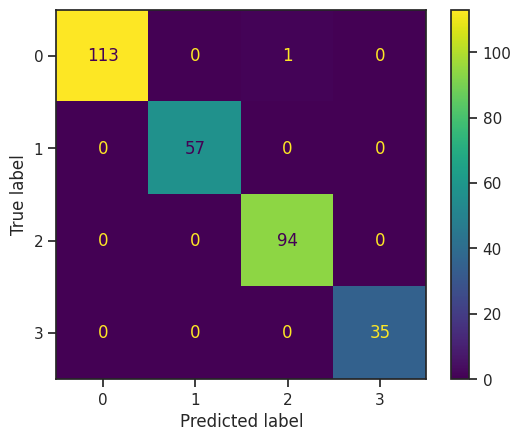

In [15]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions) # Calculate the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm) # Create the ConfusionMatrixDisplay object
disp.plot() # Plot the confusion matrix
plt.show()

#Save model

In [18]:
import joblib

# save the model to disk
filename = '/content/drive/My Drive/obesity_classification_model.sav'
joblib.dump(model.best_estimator_, filename)

# load the model from disk
loaded_model = joblib.load(filename)
print(loaded_model)
#result = loaded_model.score(X_test, y_test)
print('Hasil model menggunakan model yang sudah disimpan:',loaded_model.score(X_test, y_test))
print('Hasil model menggunakan model hasil training langsung:',model.score(X_test, y_test))

GradientBoostingClassifier(n_estimators=50)
Hasil model menggunakan model yang sudah disimpan: 0.9966666666666667
Hasil model menggunakan model hasil training langsung: 0.9966666666666667
